In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv('/content/drive/MyDrive/Copy of Influencer.csv')
print(data.head())

   Rank   Channel Info  Influence Score Followers Avg. Likes Posts  \
0     1    \ncristiano               92    485.2m       8.7m  3.4k   
1     2    kyliejenner               91    370.7m       8.2m  7.0k   
2     3     \nleomessi               90    363.9m       6.7m   915   
3     4  \nselenagomez               93    348.8m       6.1m  1.9k   
4     5      \ntherock               91    339.4m       1.8m  6.8k   

   60-Day Eng Rate New Post Avg. Likes Total Likes Country Or Region  
0            0.013                6.3m       29.1b             Spain  
1            0.014                5.0m       57.4b     United States  
2            0.010                3.5m        6.1b               NaN  
3            0.005                1.7m       11.4b     United States  
4            0.003              932.0k       12.6b     United States  


In [88]:
print(data.dtypes)

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object


In [89]:
data.columns = [column.lower() for column in data.columns]

In [90]:
print(data.dtypes)

rank                     int64
channel info            object
influence score          int64
followers               object
avg. likes              object
posts                   object
60-day eng rate        float64
new post avg. likes     object
total likes             object
country or region       object
dtype: object


In [91]:
data.columns = data.columns.str.strip()

In [92]:
data.head()

,rank,channel info,influence score,followers,avg. likes,posts,60-day eng rate,new post avg. likes,total likes,country or region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [97]:
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        else:
            return float(value)
    else:
        return value

columns_to_convert = ['followers', 'avg. likes', 'total likes', 'posts']
for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

In [98]:
data.head()

,rank,channel info,influence score,followers,avg. likes,posts,60-day eng rate,new post avg. likes,total likes,country or region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6.3m,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5.0m,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3.5m,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1.7m,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932.0k,1.260000e+10,United States


<ipython-input-99-01aed1f30bb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


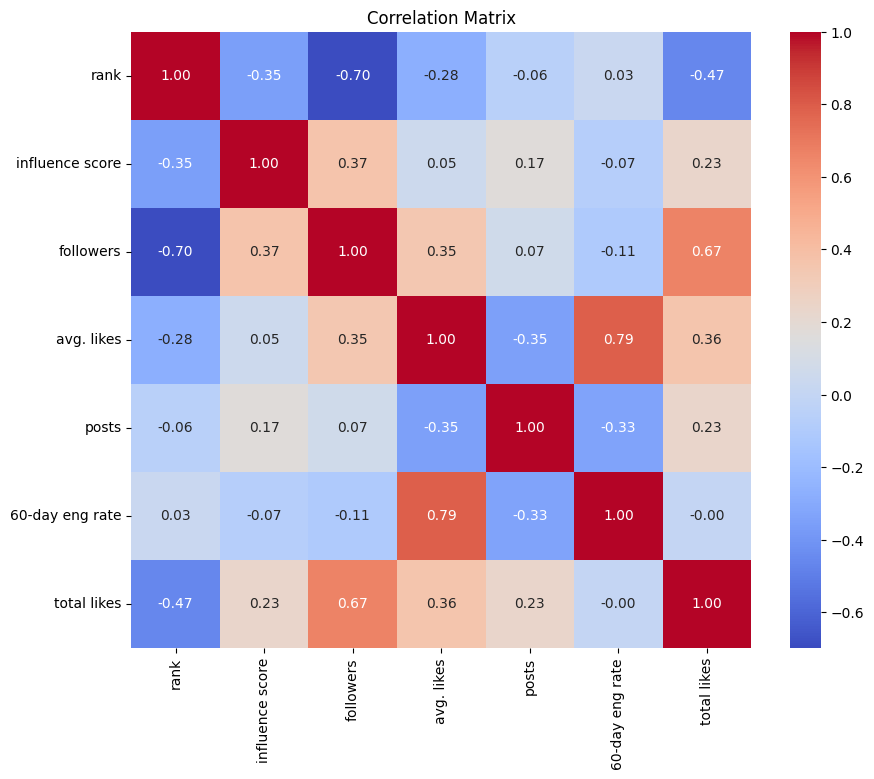

In [99]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

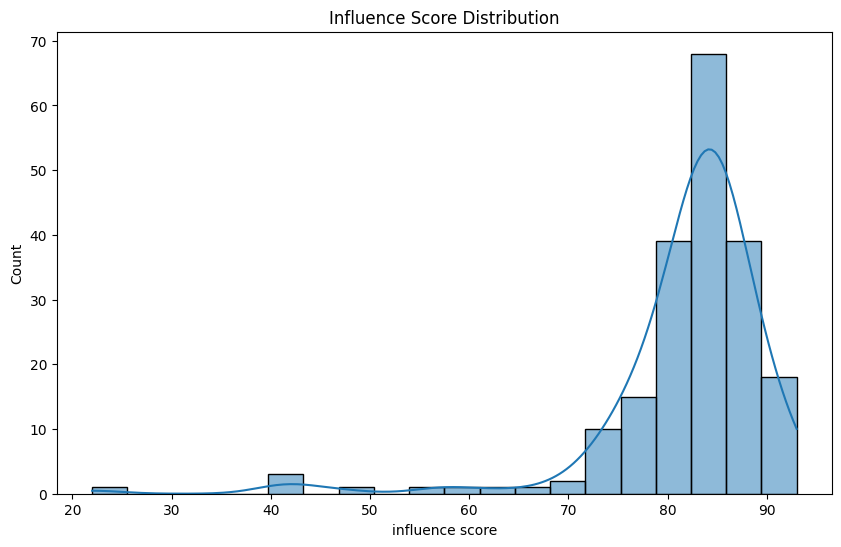

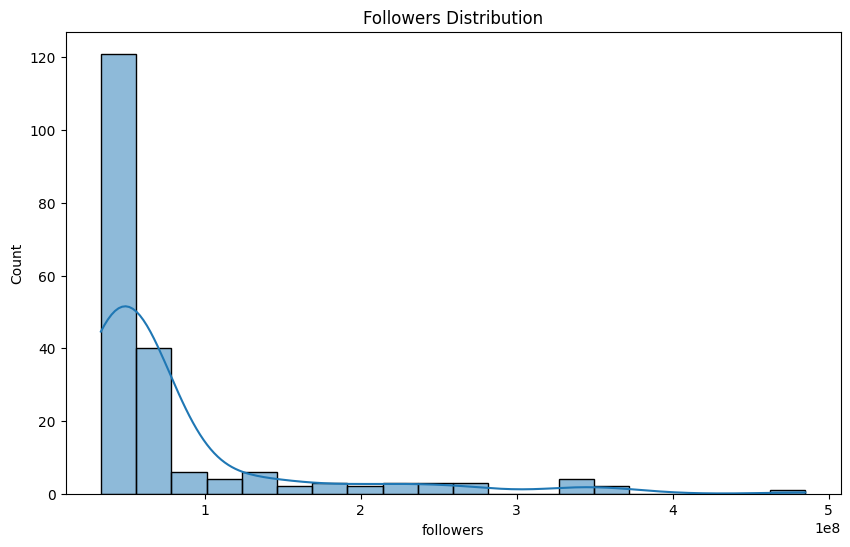

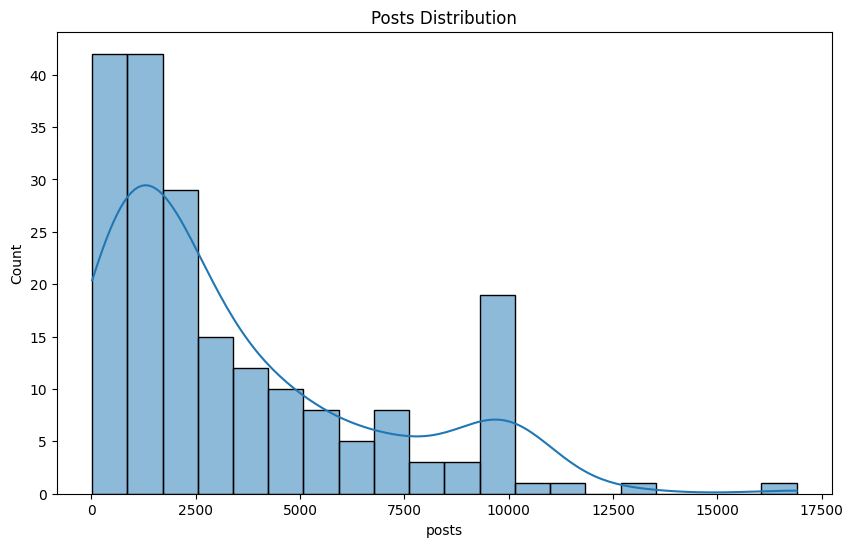

In [100]:
# Influence Score
plt.figure(figsize=(10, 6))
sns.histplot(data['influence score'], bins=20, kde=True)
plt.title('Influence Score Distribution')
plt.show()

# Followers
plt.figure(figsize=(10, 6))
sns.histplot(data['followers'], bins=20, kde=True)
plt.title('Followers Distribution')
plt.show()

# Posts
plt.figure(figsize=(10, 6))
sns.histplot(data['posts'], bins=20, kde=True)
plt.title('Posts Distribution')
plt.show()

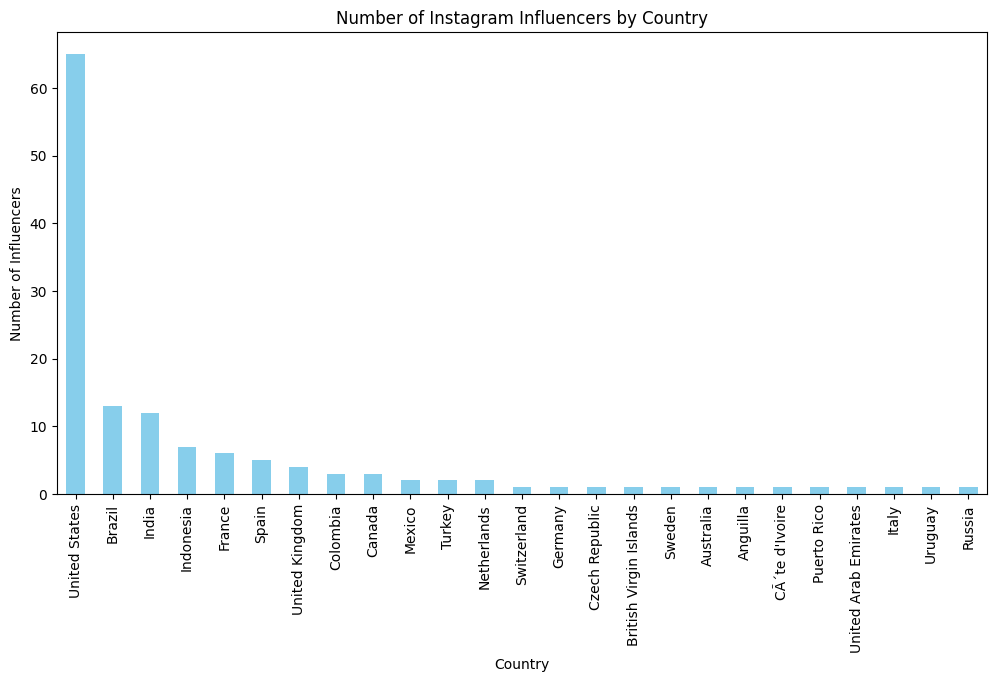

In [101]:
# Count of influencers in each country
country_counts = data['country or region'].value_counts()

# Bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

In [102]:
# Top 10 influencers based on Followers
top_followers = data.nlargest(10, 'followers')

# Top 10 influencers based on Average Likes
top_avg_likes = data.nlargest(10, 'avg. likes')

# Top 10 influencers based on Total Likes
top_total_likes = data.nlargest(10, 'total likes')

print("Top 10 Influencers based on Followers:")
print(top_followers[['channel info', 'followers']])

print("\nTop 10 Influencers based on Average Likes:")
print(top_avg_likes[['channel info', 'avg. likes']])

print("\nTop 10 Influencers based on Total Likes:")
print(top_total_likes[['channel info', 'total likes']])

Top 10 Influencers based on Followers:
        channel info    followers
0        \ncristiano  485200000.0
1        kyliejenner  370700000.0
2         \nleomessi  363900000.0
3      \nselenagomez  348800000.0
4          \ntherock  339400000.0
5     \narianagrande  333000000.0
6    \nkimkardashian  330700000.0
7          \nbeyonce  276100000.0
8  \nkhloekardashian  273900000.0
9     \njustinbieber  260000000.0

Top 10 Influencers based on Average Likes:
       channel info  avg. likes
96            \nthv  15400000.0
131           \nj.m  14400000.0
165         \nrkive  10600000.0
0       \ncristiano   8700000.0
32   \nbillieeilish   8400000.0
1       kyliejenner   8200000.0
2        \nleomessi   6700000.0
3     \nselenagomez   6100000.0
38   \nlalalalisa_m   6000000.0
22        \nzendaya   5900000.0

Top 10 Influencers based on Total Likes:
       channel info   total likes
1       kyliejenner  5.740000e+10
0       \ncristiano  2.910000e+10
22        \nzendaya  2.080000e+10
6   \nkimkard

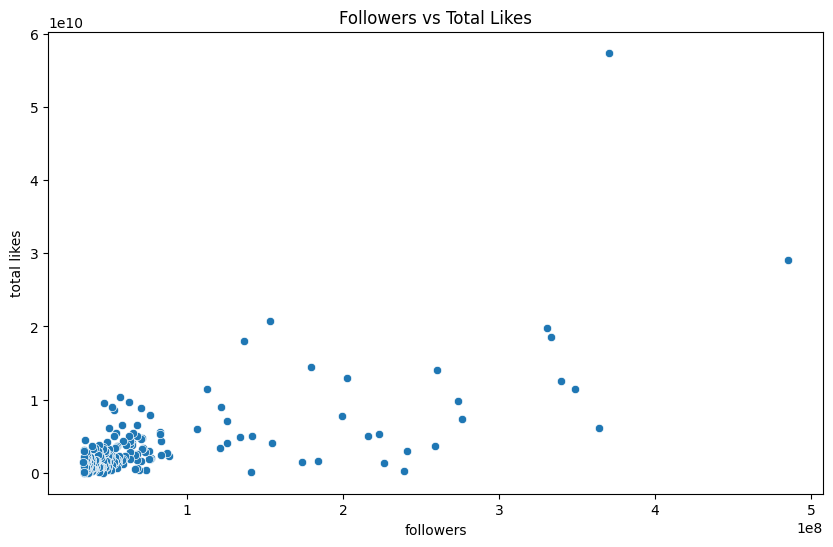

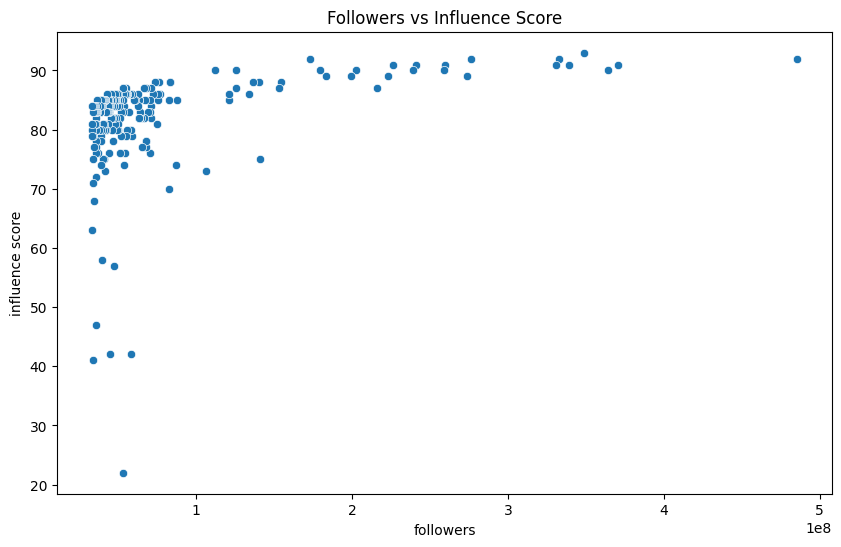

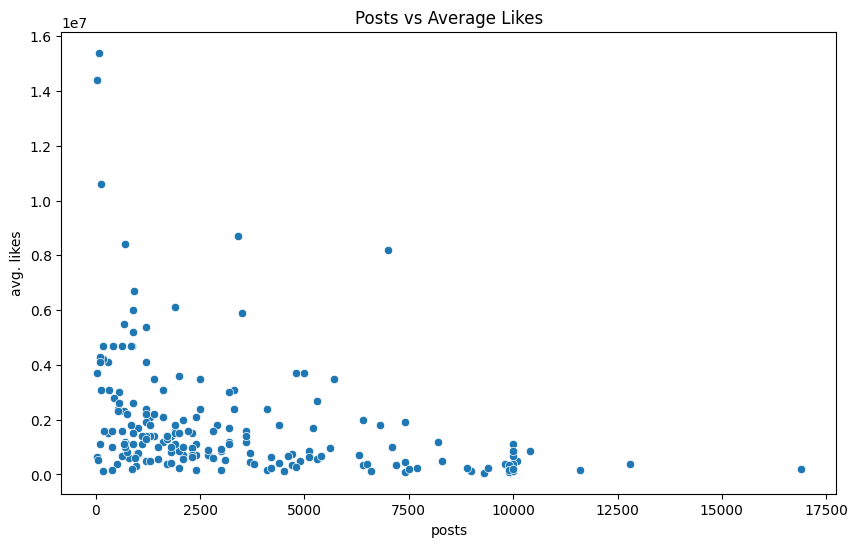

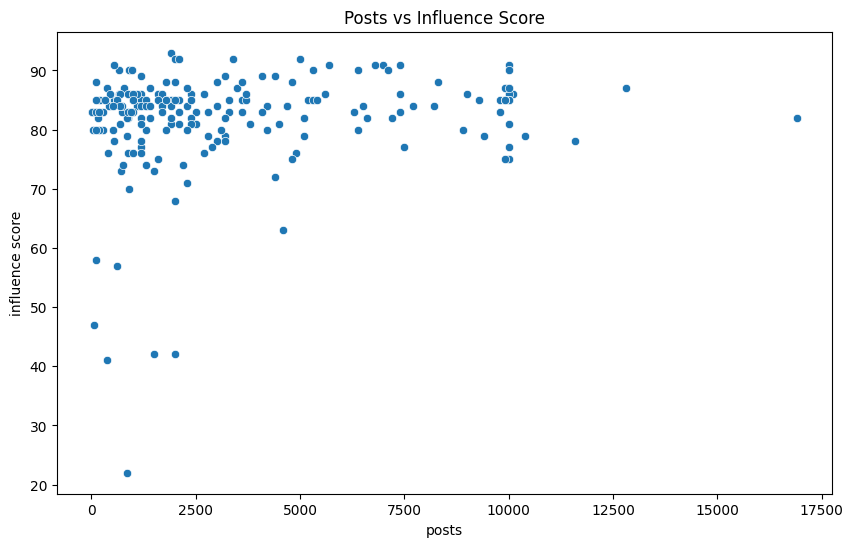

In [103]:
# Followers and Total Likes (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='total likes', data=data)
plt.title('Followers vs Total Likes')
plt.show()

# Followers and Influence Score (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='influence score', data=data)
plt.title('Followers vs Influence Score')
plt.show()

# Posts and Average Likes (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='posts', y='avg. likes', data=data)
plt.title('Posts vs Average Likes')
plt.show()

# Posts and Influence Score (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='posts', y='influence score', data=data)
plt.title('Posts vs Influence Score')
plt.show()